In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animals10


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (227, 227)
batch_size = 32
extract_path = "/kaggle/input/animals10/raw-img"

datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    extract_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    extract_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

2025-10-27 20:13:37.702301: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761596017.921167      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761596017.988624      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(227, 227, 3)),
    Conv2D(96, (11, 11), strides=4, activation='relu'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

I0000 00:00:1761596105.201928      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761596105.202680      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,324,746 (222.49 MB)

 Trainable params: 58,323,530 (222.49 MB)

 Non-trainable params: 1,216 (4.75 KB)

None


In [4]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1761596115.800273     113 service.cc:148] XLA service 0x7ac850005540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761596115.801492     113 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761596115.801512     113 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761596116.368007     113 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/655 ━━━━━━━━━━━━━━━━━━━━ 48s 75ms/step - accuracy: 0.1719 - loss: 5.1360   

I0000 00:00:1761596123.389697     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


655/655 ━━━━━━━━━━━━━━━━━━━━ 1329s 2s/step - accuracy: 0.2911 - loss: 2.7920 - val_accuracy: 0.4683 - val_loss: 1.5672
Epoch 2/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 295s 451ms/step - accuracy: 0.4816 - loss: 1.5446 - val_accuracy: 0.4052 - val_loss: 1.7652
Epoch 3/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 59s 89ms/step - accuracy: 0.5609 - loss: 1.2972 - val_accuracy: 0.4981 - val_loss: 1.4469
Epoch 4/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 63s 96ms/step - accuracy: 0.6037 - loss: 1.1633 - val_accuracy: 0.5606 - val_loss: 1.2985
Epoch 5/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 60s 92ms/step - accuracy: 0.6602 - loss: 1.0123 - val_accuracy: 0.5382 - val_loss: 1.3482
Epoch 6/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 59s 90ms/step - accuracy: 0.6921 - loss: 0.8984 - val_accuracy: 0.5623 - val_loss: 1.2776
Epoch 7/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 60s 91ms/step - accuracy: 0.7322 - loss: 0.7927 - val_accuracy: 0.5810 - val_loss: 1.2051
Epoch 8/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 59s 90ms/step - accuracy: 0.7587 - loss: 0.7081 - val_accur

In [5]:
loss, accuracy = model.evaluate(val_generator)
print(f"Точність на валідації: {accuracy:.4f}")
print(f"Втрати (Loss): {loss:.4f}")

164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.6542 - loss: 1.4768
Точність на валідації: 0.6485
Втрати (Loss): 1.5021


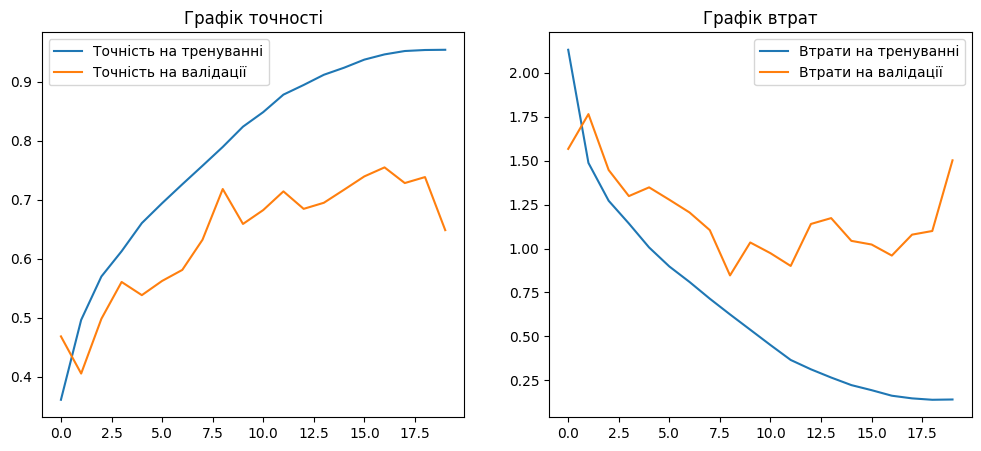

In [6]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
losses = history.history['loss']
val_losses = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точність на тренуванні')
plt.plot(epochs_range, val_acc, label='Точність на валідації')
plt.legend()
plt.title('Графік точності')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, losses, label='Втрати на тренуванні')
plt.plot(epochs_range, val_losses, label='Втрати на валідації')
plt.legend()
plt.title('Графік втрат')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


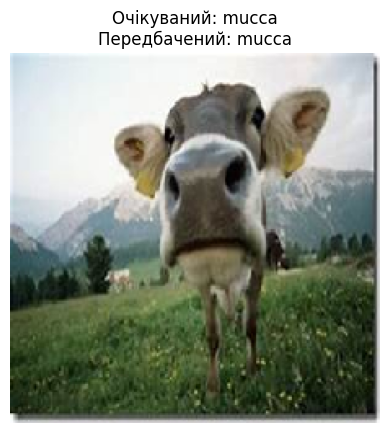

In [7]:
import numpy as np
import random
import os
from tensorflow.keras.preprocessing import image

class_names = list(train_generator.class_indices.keys())
random_class = random.choice(class_names)
random_image_path = random.choice(os.listdir(f"{extract_path}/{random_class}"))
img_path = f"{extract_path}/{random_class}/{random_image_path}"

img = image.load_img(img_path, target_size=(227, 227))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

plt.imshow(img)
plt.axis('off')
plt.title(f"Очікуваний: {random_class}\nПередбачений: {predicted_class}")
plt.show()

In [8]:
import pandas as pd

num_images = 1024
batch_size = 128
output_csv = "classification_results.csv"

all_images = []
for class_name in os.listdir(extract_path):
    class_dir = os.path.join(extract_path, class_name)
    if os.path.isdir(class_dir):
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            all_images.append((img_path, class_name))

selected_images = random.sample(all_images, num_images)

def load_batch(image_data):
    images, paths, true_classes = [], [], []
    for img_path, true_class in image_data:
        img = image.load_img(img_path, target_size=(227, 227))
        img_array = image.img_to_array(img) / 255.0
        images.append(img_array)
        paths.append(img_path)
        true_classes.append(true_class)
    return np.array(images), paths, true_classes

results = []
for i in range(0, num_images, batch_size):
    batch_data = selected_images[i:i+batch_size]
    batch_images, batch_paths, batch_true_classes = load_batch(batch_data)
    predictions = model.predict(batch_images)
    predicted_classes = np.argmax(predictions, axis=1)
    for j in range(len(batch_paths)):
        results.append([
            batch_paths[j],
            batch_true_classes[j],
            class_names[predicted_classes[j]]
        ])

df = pd.DataFrame(results, columns=["Шлях до файлу", "Справжній клас", "Розпізнаний клас"])
df.to_csv(output_csv, index=False, encoding="utf-8")
print(f"Результати збережені у {output_csv}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Результати збережені у classification_results.csv
